# Latent Manifold and Regression

This example explains Multiple Linear Regression with Python 3, pandas and scikit-learn on Jupyter Notebook. We selected fake news data set. This dataset is not for regression problem so we are doing some more models to get good story.

## Requirements
To use this example you need Python 3 and latest versions of pandas and scikit-learn. I used Anaconda distribution to install.

### Data Set: 
1.	Kaggle fake news dataset: https://www.kaggle.com/snapcrack/all-the-news
2.	Real News Dataset https://webhose.io/datasets/
3.	Domain Ranking: https://www.rankstore.com/bulk-alexa-rank-checker/#

### Data Prep and enrichment: 
1.	Fixed format of file and data types
2.	Filled several missing values for columns
3.	Data Enrichment: Downloaded real news data from webhose and massaged it. Wrote a program to aline format and merge file(File: Webhose_RealNews_DataPull.py). Then added this dimention after transposing to dataset. (enrichment)
4.	Domain ranking is the latent manifold.


### ML life-cycle:
1.	Business objective connected to it.
2.	Data set, data enrichment, wrangle and prepare it.
3.	Find a latent manifold
4.	What the data is saying

## Algorithm
1.	Multiple Linear Regression.

In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
#df = pd.read_csv('RealNewsData1.tsv', delimiter='\t', quoting=3)#3 - ignores ""
df = pd.read_csv('fake_real_dataset.csv')
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values

print(df.shape)
df.describe()

(3711, 20)


,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,3711.000000,3.711000e+03,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,1.669631,3.265969e+05,0.044921,2.291296,2.106710,24.406090,0.252493,24.398814
std,10.162467,1.209855e+06,0.160145,15.017726,9.617506,113.799844,5.814621,113.797344
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.890000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.576100e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,8.194000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,7.310981e+06,1.000000,500.000000,296.000000,999.000000,319.000000,999.000000


In [3]:
df.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [5]:
# selecting Latent column
dft = df.loc[:, ['domain_rank', 'shares', 'type']]
print(dft.shape)
print('----------')
X = dft.iloc[:, :-2].values
y = dft.iloc[:, 1].values
print(X)

(3711, 3)
----------
[[88465]
 [88465]
 [88465]
 ...
 [  283]
 [  943]
 [   13]]


In [6]:
print(y)

[0 0 0 ... 3 6 0]


In [5]:
# LabelEncoder - Encoding categorical data to number, OneHotEncoder - row to column 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
#onehotencoder = OneHotEncoder(categorical_features = [0])
#y = onehotencoder.fit_transform(y).toarray()
print(y)

[0 0 0 ... 3 6 0]


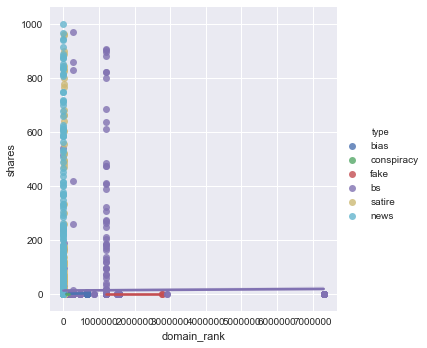

In [7]:

import seaborn as sns
sns.set()

# Plot
g = sns.lmplot(x="domain_rank", y="shares", hue="type",
               truncate=True, data=dft)

# Use more informative axis labels than are provided by default
g.set_axis_labels("domain_rank", "shares")


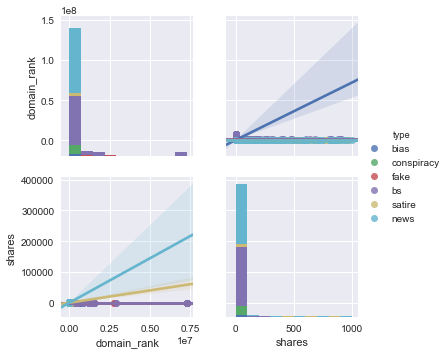

In [8]:
#Pairplot
g = sns.pairplot(dft, kind="reg", hue="type")

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[24.97602371 25.1873556  21.69848886 25.2417468  25.20779126 25.24297276
 25.24351813 25.24214323 25.24336231 25.17770836 25.2417468  24.89373113
 25.07321566 25.24389623 25.24325919 25.24336231 25.11423134 24.97602371
 25.24297276 25.24389623 25.2417468  25.18757329 25.24297276 24.67707835
 25.03886598 25.24389623 25.24213636 25.24389623 25.24297276 25.17770836
 25.19173467 25.24325461 25.24389623 25.24309191 25.05614165 25.2417468
 25.2417468  25.24325461 21.69848886 25.1873556  25.07321566 25.24316753
 25.07321566 21.69848886 24.68415911 24.67707835  8.49074733 25.24389623
 25.24297276 24.68415911 24.63208463 22.51462952 25.07321566 25.24324544
 22.51462952 25.24350209 25.24302088 25.08457237 25.17770836 21.69848886
 25.24317441 24.67707835 25.1873556  25.17770836 25.11423134 25.24297276
 22.51462952 25.08457237 24.63208463 25.03886598 24.63208463 25.24319045
 25.24251216 25.07321566 25.07321566 25.2438779  25.2417468  25.24389623
 25.19173467 25.08457237 24.97602371 24.67707835 25.

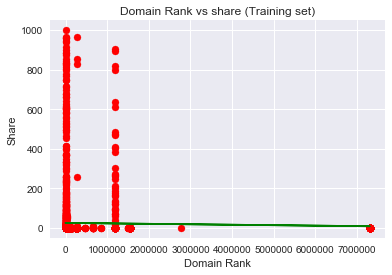

In [12]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Domain Rank vs share (Training set)')
plt.xlabel('Domain Rank')
plt.ylabel('Share')
plt.show()

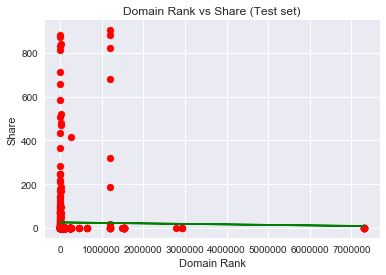

In [13]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Domain Rank vs Sbhare (Test set)')
plt.xlabel('Domain Rank')
plt.ylabel('Share')
plt.show()

# Evaluating Model

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [14]:
from sklearn import metrics

In [16]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 43.774115065255494
MSE: 12768.482118816104
RMSE: 112.99770846710169


# Residuals

/Users/mk194903/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


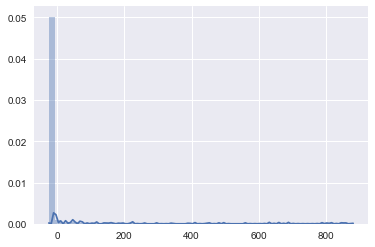

In [17]:
# The normal distributions of residuals indicate that the model is a very good fit.

sns.distplot((y_test-y_pred),bins=50);

# Story 
As domain ranking grows people becomes less likely to share. Ideally, there is not regression.